# 2D Data Processing Using FeatureDetection

This notebook contains an example showing how to implement
the feature detection algoithm on 2D Data.

In [1]:
from time import time
import matplotlib.pyplot as plt

from pyc2mc.time_dependent.td_data import TimeDependentData
from pyc2mc.processing.roi_detection import FeatureDetection

## 1. Load the data

We start reading the files by using the `TimeDependentData.from_directory()`
method that has the following arguments:

* **directory_path:** input directory.
* **ext (optional):** the extension of the files: `pks, ascii, txt`
* **verbose:** if True it shows the information of the reading procedure.
* **sorting:** if True it sorts the files by index name.

Use the following expressions:

In [2]:
# PKS files
MagLab_data = TimeDependentData.from_directory(
    directory_path="data/200207_A2017/",
    verbose=False
)

In [3]:
MagLab_data

TimeDependentData (900 scans)
Scan 0: 1925 peaks [200.06 ; 1198.13]
Scan 1: 2083 peaks [200.05 ; 1198.90]
Scan 2: 1992 peaks [200.27 ; 1198.90]
Scan 3: 2131 peaks [200.24 ; 1198.91]
Scan 4: 2178 peaks [200.24 ; 1198.90]
Scan 5: 2093 peaks [200.26 ; 1198.90]
...
Scan 895: 2258 peaks [200.06 ; 1198.13]
Scan 896: 2051 peaks [200.05 ; 1198.90]
Scan 897: 2075 peaks [200.27 ; 1198.90]
Scan 898: 2134 peaks [200.24 ; 1198.91]
Scan 899: 2136 peaks [200.24 ; 1198.90]

In [4]:
MagLab_data.data_summary()

retentionTime                mz_bounds  N_peaks        TIC        BPC  \
scan                                                                          
0               0.0   (200.0615, 1198.12687)     1925  22.657074  51.134360   
1               1.0  (200.05361, 1198.89767)     2083  24.449061  42.010783   
2               2.0  (200.26996, 1198.89918)     1992  23.095975  41.931097   
3               3.0     (200.2446, 1198.907)     2131  24.913257  44.598229   
4               4.0  (200.24401, 1198.89902)     2178  24.658052  45.981339   
...             ...                      ...      ...        ...        ...   
895           895.0  (200.41086, 1198.82849)     2258  26.207287  49.622447   
896           896.0  (200.41111, 1199.47609)     2051  24.102376  50.288605   
897           897.0   (200.20112, 1198.8201)     2075  24.062412  49.812178   
898           898.0  (200.39119, 1198.82627)     2134  24.135586  53.164745   
899           899.0  (200.41219, 1198.82621)     2136  23.658057  49.885227   

        mz_max_I  
scan              
0     1100.50333  
1      254.35937  
2     1100.50037  
3     1100.48998  
4     1100.48897  
...          ...  
895    254.35940  
896    254.35941  
897    254.35941  
898   1100.37812  
899    254.35941  

[900 rows x 6 columns]

## 2. Manage the raw data

Some functions can be use to delimit the range of scans, or masses. For example, to limit the range of scans from 300 to 700 in this case you can use the following expression:

In [5]:
new_data = MagLab_data[300:700]

In [6]:
new_data

TimeDependentData (400 scans)
Scan 300: 2130 peaks [200.16 ; 1198.97]
Scan 301: 2195 peaks [200.07 ; 1198.97]
Scan 302: 2195 peaks [200.39 ; 1198.98]
Scan 303: 2112 peaks [200.33 ; 1199.44]
Scan 304: 2143 peaks [200.35 ; 1198.97]
Scan 305: 2144 peaks [200.39 ; 1198.97]
...
Scan 695: 2356 peaks [200.16 ; 1198.97]
Scan 696: 2359 peaks [200.07 ; 1198.97]
Scan 697: 2345 peaks [200.39 ; 1198.98]
Scan 698: 2200 peaks [200.33 ; 1199.44]
Scan 699: 2268 peaks [200.35 ; 1198.97]

Use the `delimit_mass` function to limit the m/z range as follows:

In [7]:
new_data = new_data.delimit(mz_bounds=(100, 900))

Plot the Total Ion Current Chromatogram using the ``TimeDependentData`` class:

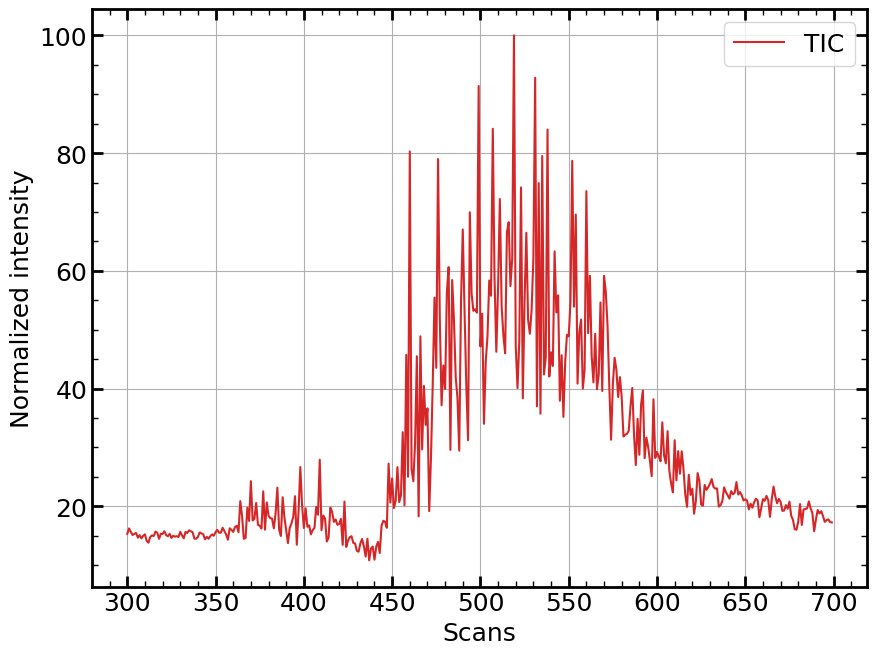

In [8]:
new_data.plot();

## 3. Feature Detection

### 3.1 Perform the Regions of Interest Detection

The next step is to process data using the `FeatureDetection`. This Feature Detection Algorithm uses the clustering approach by nominal mass. The following parameters must be specifyied:

* **raw_data:** object containing the lists of masses and intensities from the time-resolved data (scans).
* **min_centroids:** minimum number of consecutive points to consider a feature as a ROI. For defining this value it could be helpful to know the minimum chromatographic peak width.
* **lambda_parameter:** this value is the mass accuracy of the mass spectra, it is given in ppm. It has a default value of 10 ppm. 
* **continuity_min:** minimum number of scans to check if a ROI is taken as one or if it is splitted due to this minimum separation. It has a default value of 1. A value of 1 means that if a ROI is not continue in the scan order it will be splitted. A value of two implies that if a disonctinuity of one scan exists, it is negligable, so the ROI is not splitted, even with this void.
* **groupby_integer_part:** condition to apply the clustering approach by nominal masses, which stands that there is only one island of data on each nominal mass. 

In [9]:
fd = FeatureDetection(
    raw_data=new_data,
    min_centroids=6,
    lambda_parameter=1,
    continuity_min=6,
    groupby_integer_part=True
)

Run the FeatureDetection

In [10]:
start = time()
roi = fd.run()
end = time()
print(f"Elapsed time: {end - start:.1f} s") 

Elapsed time: 53.1 s


Plot the resulting analyisis:

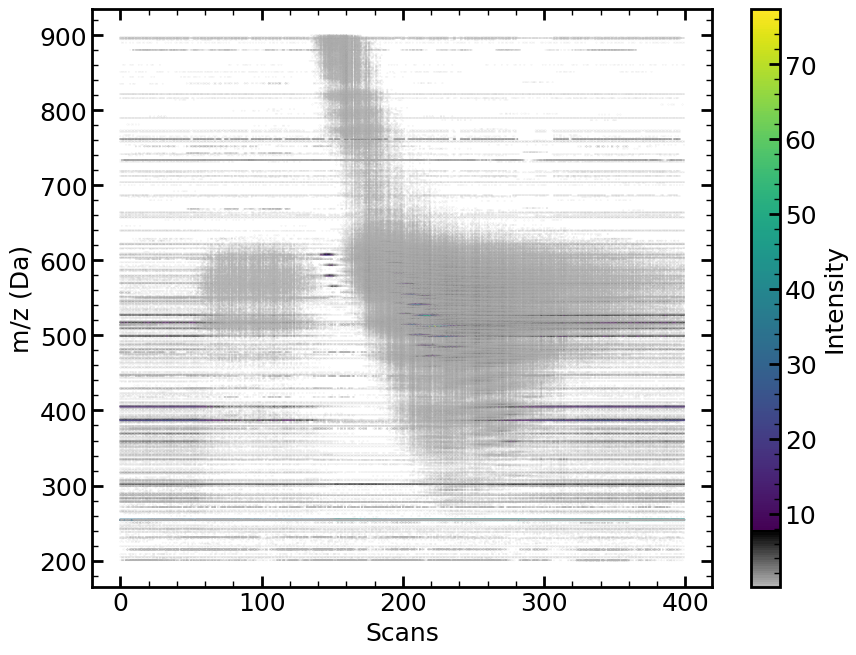

In [11]:
roi.plot(markersize=2, scale_intensity=True)

Compare original TIC and TIC from ROI.

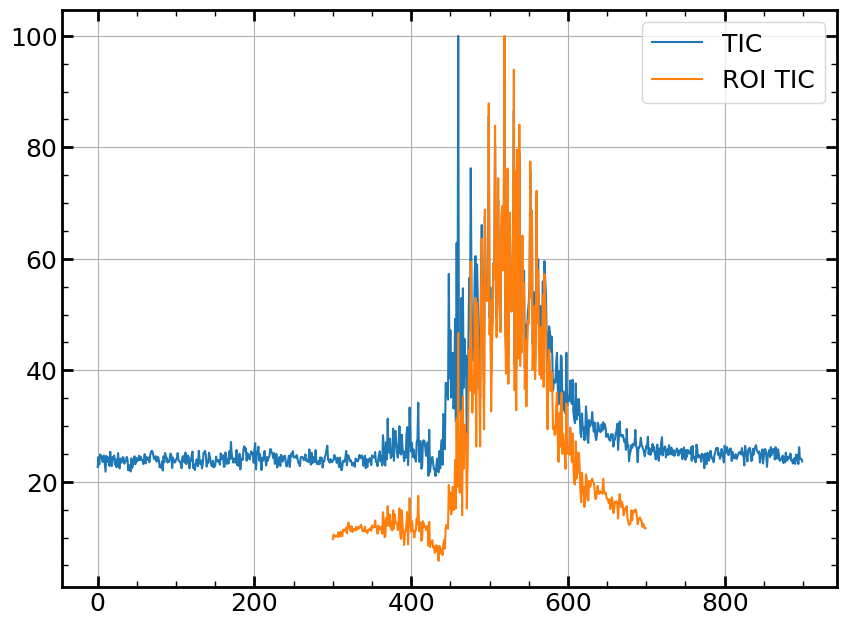

In [12]:
tic = MagLab_data.get_total_ion_chromatogram()
t = MagLab_data.get_retention_times()

roi_t, roi_tic = roi.get_total_ion_chromatogram()
roi_t += 300
#roi_t = roi.get_retention_times(t0=300)

plt.plot(t, tic, label="TIC")
plt.plot(roi_t, roi_tic, label="ROI TIC")
plt.legend()

zoom in the plot on a certain region:

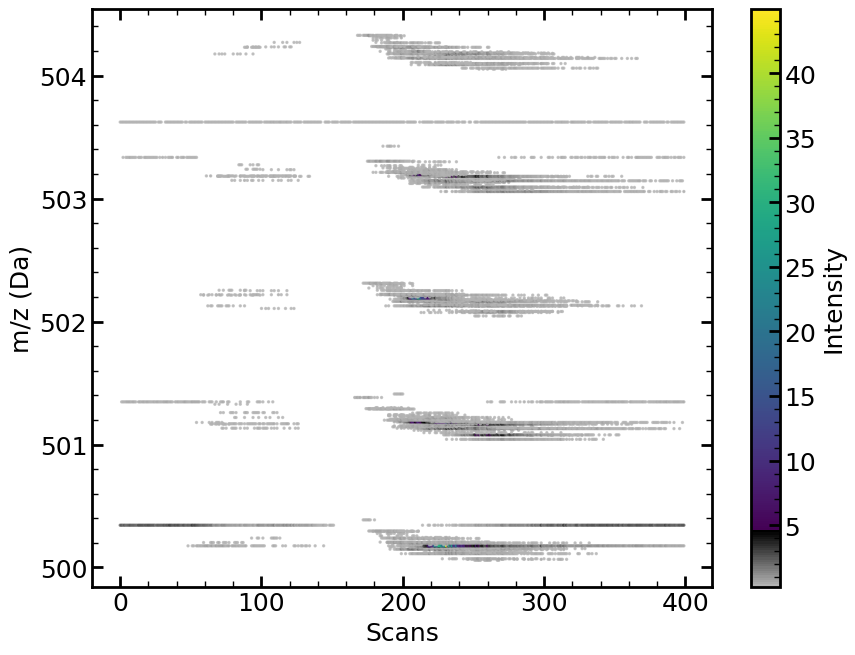

In [13]:
roi.plot(mz_bounds=(500, 505), scale_intensity=False, markersize=2)

### 3.2 Cleaning Noise

To clean long features that are considered as noise or contaminants, the following 
procedure could be performed using the `remove_roi_in_range` method.

In [14]:
new_roi = roi.remove_roi_in_range(
    threshold=0.8
)

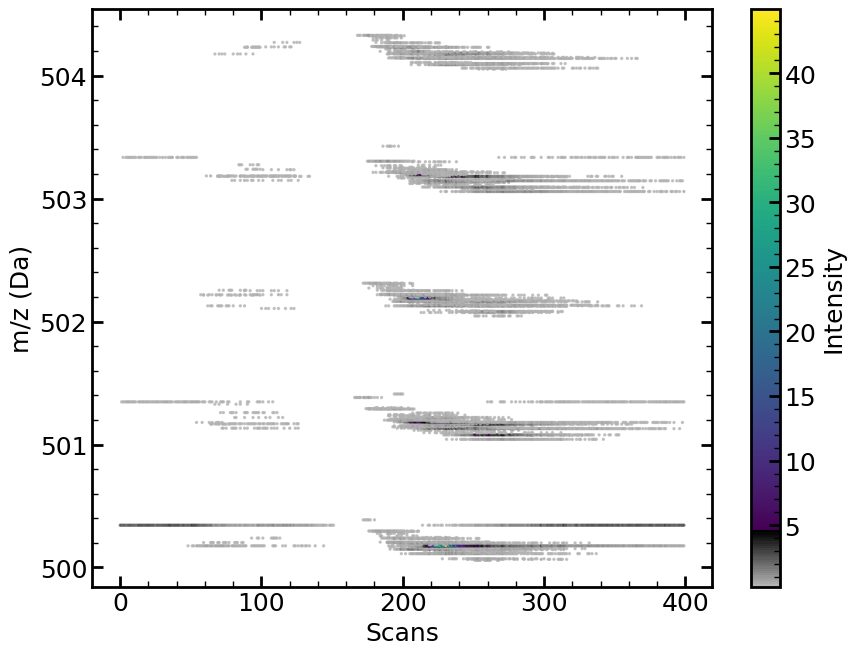

In [15]:
new_roi.plot(mz_bounds=(500, 505), scale_intensity=False, markersize=2)

Filter using a threshold of percentage of the time-dependant axis lenght. For example, if 60% is chosen, it will search Feature that are present along the 60% of the scans or more. It means that, as long as the scans lenght is 400, it will delete features with a lenght superior than 240.

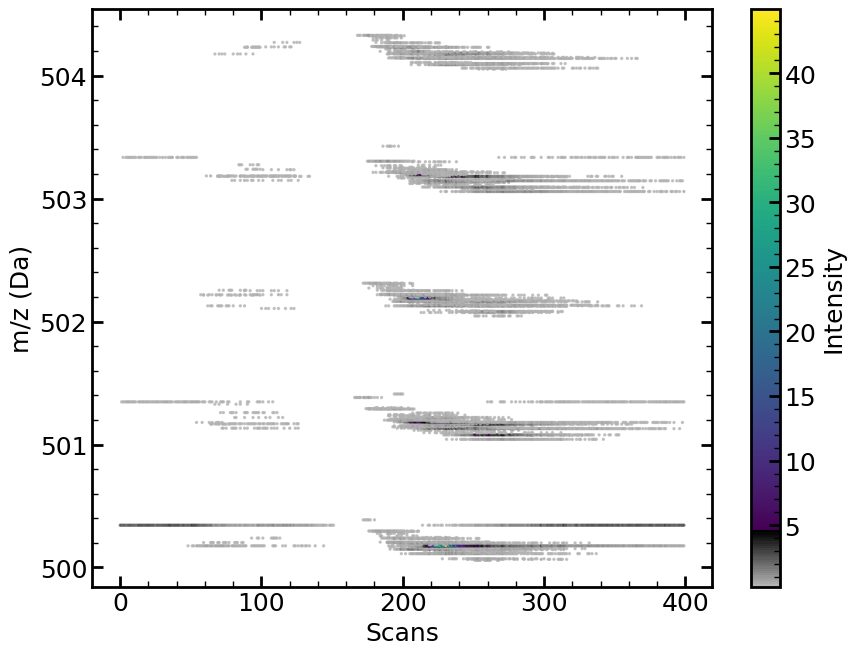

In [16]:
new_roi2 = roi.remove_roi_in_range(threshold=.6)
new_roi2.plot(mz_bounds=(500, 505), scale_intensity=False, markersize=2)

### 3.3 Explore Regions of Interest (ROI)

Now we will look for ROI in a specific mass range.

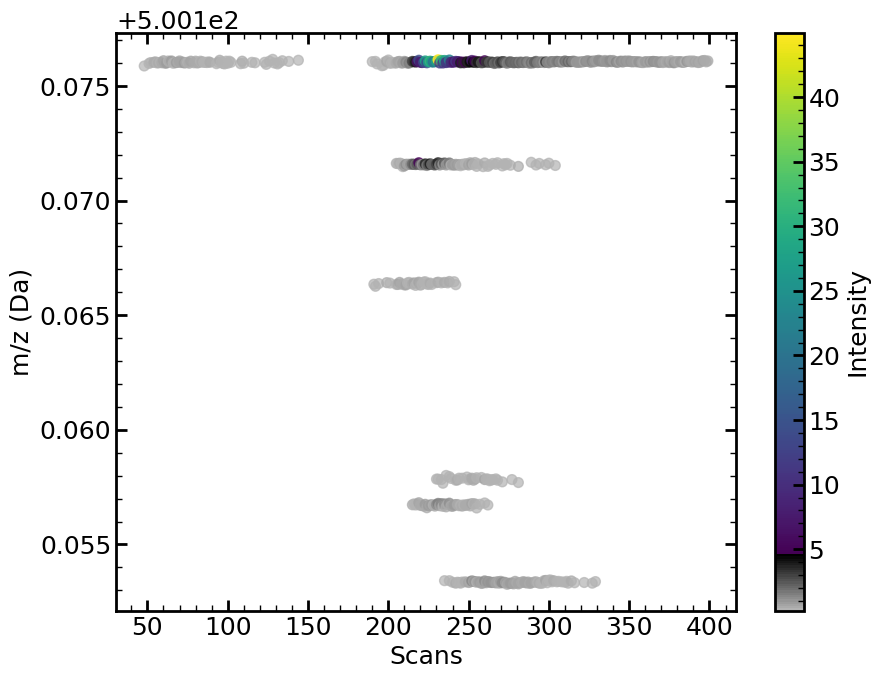

In [17]:
new_roi.plot(mz_bounds=(500.15, 500.18));

In [18]:
idx = new_roi.find_roi(mz=500.175, lambda_parameter=10)
idx

 9922 500.171590 +/- 3.83e-05 (65 points)
 9923 500.171595 +/- 4.84e-05 (6 points)
 9924 500.176033 +/- 4.43e-05 (63 points)
 9925 500.176063 +/- 3.88e-05 (207 points)


array([9922, 9923, 9924, 9925])

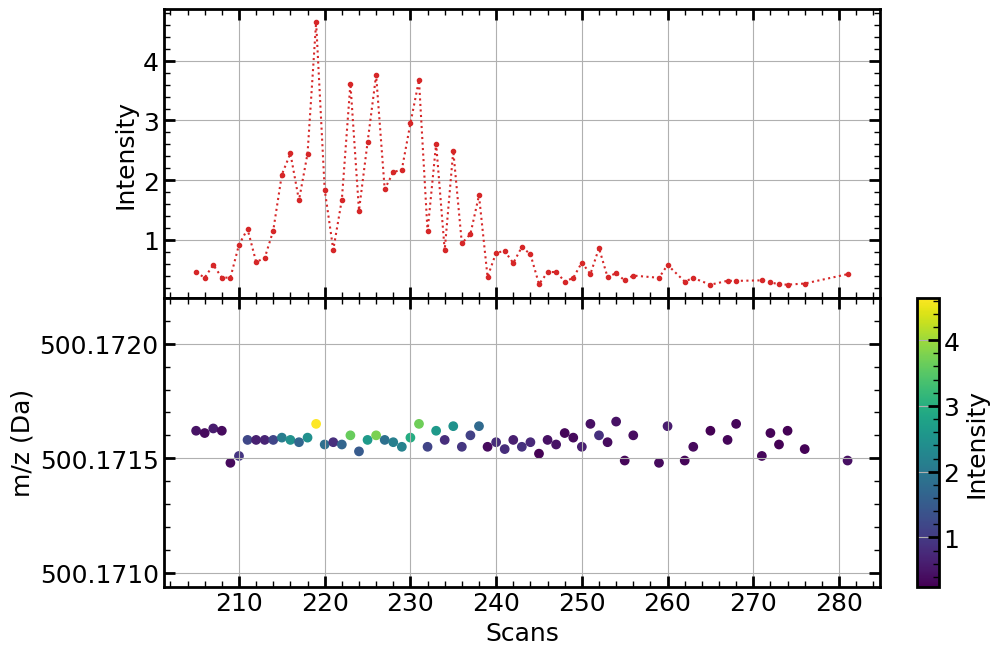

In [19]:
new_roi[9922].plot()

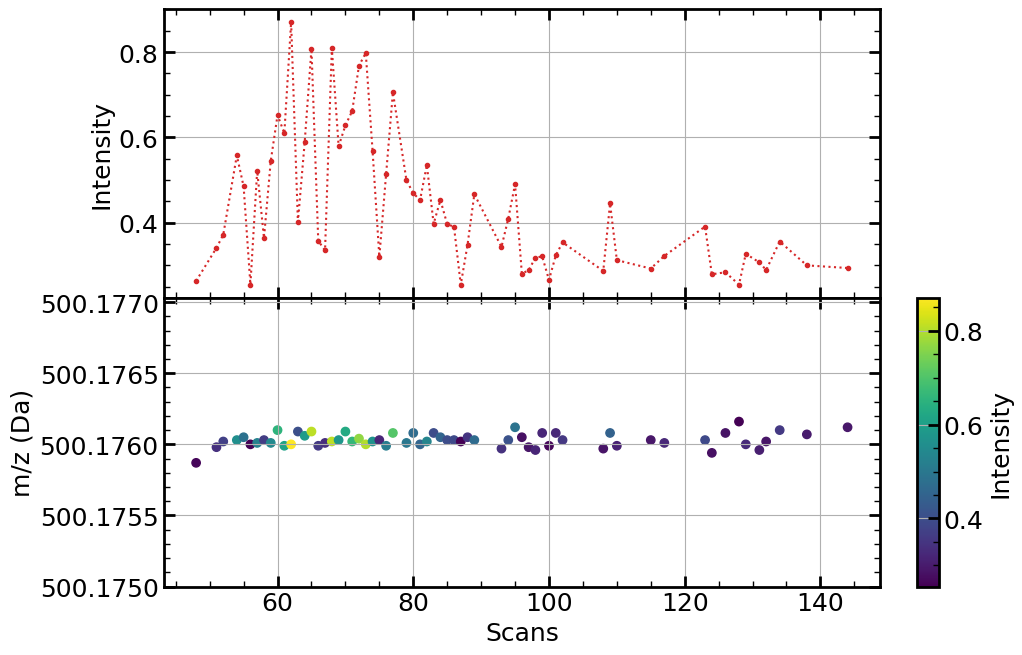

In [20]:
new_roi[9924].plot()

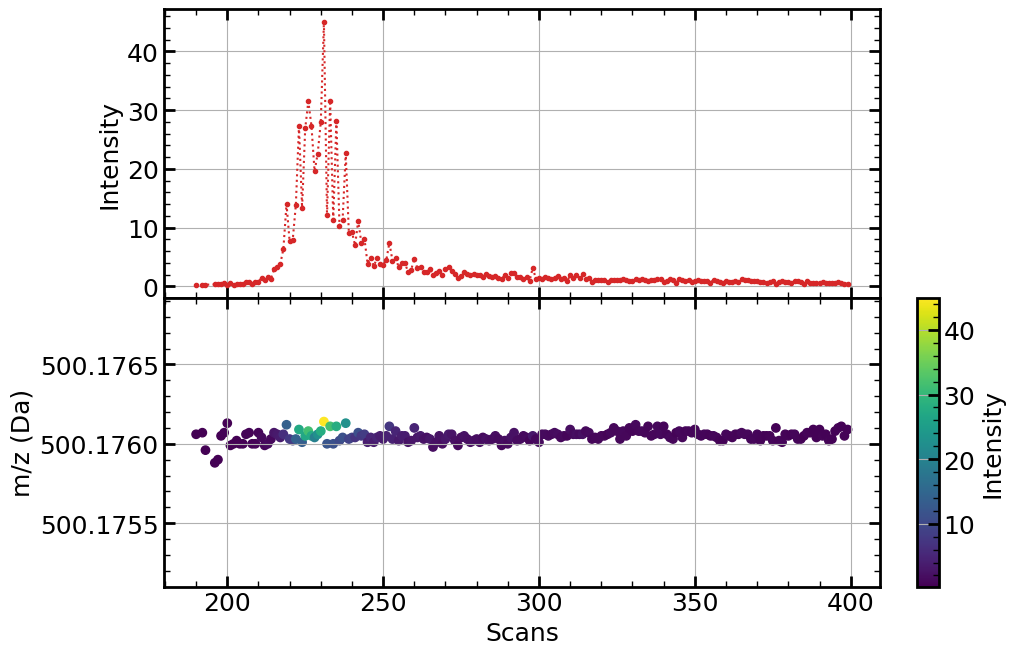

In [21]:
new_roi[9925].plot()

## 4. Get and Attribute the averaged PeakList

Hereafter, an average peaklist is built from the detected ROI and then attributed.

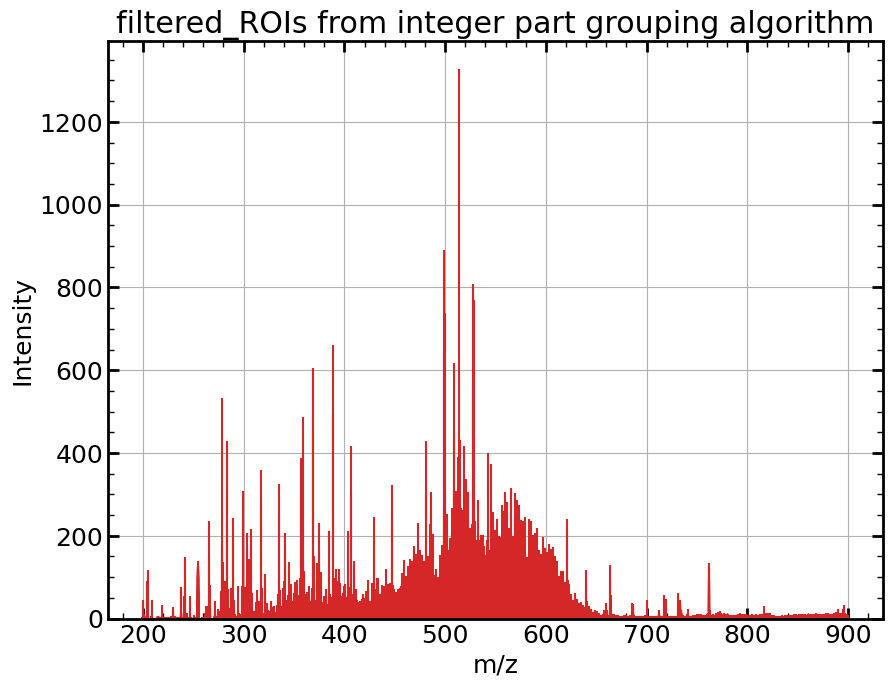

In [22]:
new_roi.get_ave_peaklist().plot()

### 4.1 Recalibration

This part is for illustration only. If needed, calibration should be done before feature detection.

In [23]:
from pyc2mc.processing.recalibration import Recalibration
from pyc2mc.io.caliblist import CalibList

In [24]:
# define the calibration list from some internal calibrants
mass_list = [499.169720, 542.224495, 513.185370, 486.1618949, 570.255795, 606.255795, 620.2714454]
mass_exp = [499.168240, 542.222799, 513.183821, 486.160469, 570.253937, 606.253731, 620.269269]
cl = CalibList(mz_theo=mass_list, mz_exp=mass_exp, polarity=1)
cl

CalibList (7 peaks) 486.16 -> 620.27
Calibration Point: 486.16
Calibration Point: 499.17
Calibration Point: 513.19
Calibration Point: 542.22
Calibration Point: 570.26
Calibration Point: 606.26
Calibration Point: 620.27

In [25]:
recal = Recalibration(
    calibration_list=cl,
    model="polynomial", deg=2,
    fit_intercept=True,
    verbose=True
)

CALIBRATION SUMMARY
-------------------
Calibration list             : calibration_list
Number of data points        : 7
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 9.15582e-09 B: 9.99995e-01 C: 1.48828e-03
Root mean squared error (ppm): 0.011262
Calibration mz range         : 486.16, 620.27



In [26]:
recal_pl = recal.recalibrate(new_roi.get_ave_peaklist())

Calibrating peaklist: filtered_ROIs from integer part grouping algorithm
24333 peaks (200.36 -> 899.77) Da


### 4.2 Molecular attribution

In [27]:
from pyc2mc.processing.standard_attribution import isotopic_pattern_attribution
from pyc2mc.core.formula_grid import FormulaGrid

<div class="alert alert-warning">

**Remark:** This formula grid aims to attribute only vanadyl porphyrins. We
set the presence of vanadium and four nitrogen as mandatory for all formulas.
    
</div>

In [28]:
# Define the first iteration and then add each step
fg = FormulaGrid(
    elements=["C", "H", "N", "O", "S", "V"],
    limits=[[1, 100], [1, 200], [4, 4], [1, 1], [0, 0], [1, 1]],
    H_C_bounds=[0.3, 2.4],
    dbe_bounds=[0, 50],
    mass_bounds=[100, 900],
    polarity=1,
    element_ratios={("O", "C"): (0, 0.8)},
    isotopes={(6, 13): 2},
)

In [29]:
attr_pl = isotopic_pattern_attribution(
    peaklist=recal_pl,
    formula_grid=fg,
    lambda_parameter=0.3,
)

Summary of results:

In [30]:
attr_pl.summary()

 Attribution results:
 Total number of peaks: 24333
 Attributed peaks     : 391
 Mean error (ppm)     : 0.00328
 Std error (ppm)      : 0.06739
 Attributed percentage: 1.61 %
 hits percentage      : 4.83 %


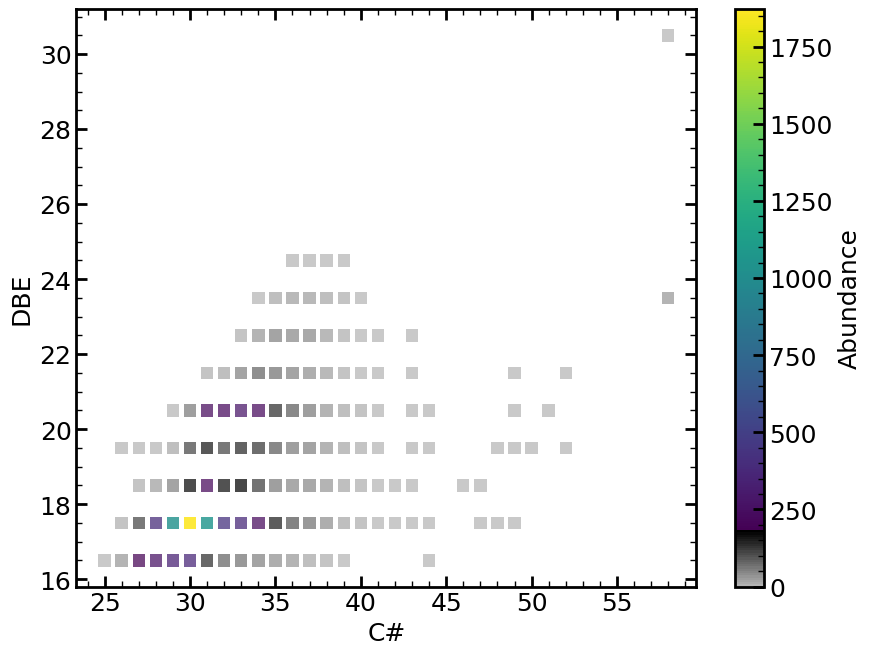

In [31]:
attr_pl.plot.plot_dbe('O1 N4 V1', markersize=80, non_integer_dbe=True)

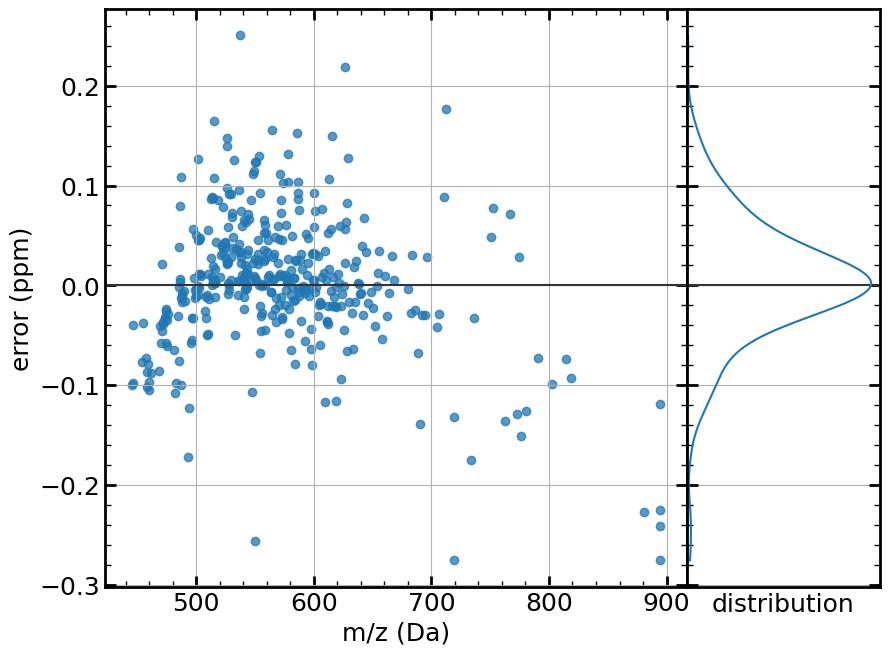

In [32]:
attr_pl.plot.plot_error(distribution=True);

In [33]:
attr_pl.to_dataframe(attributed_only=True).sort_values(by='intensity', ascending=False)

mz    intensity                formula  polarity  error_ppm  \
10672  514.193193  1328.779438       C30 H31 O1 N4 V1         1   0.003852   
11740  528.208845   770.196950       C31 H33 O1 N4 V1         1  -0.000153   
9925   500.177550   738.645203       C29 H29 O1 N4 V1         1  -0.010622   
10912  515.196549   430.574680  C29 H31 O1 N4 V1 13C1         1   0.001968   
12442  542.224495   400.861081       C32 H35 O1 N4 V1         1   0.000818   
...           ...          ...                    ...       ...        ...   
10408  510.161920     1.829742       C30 H27 O1 N4 V1         1  -0.048762   
15103  576.208810     1.769450       C35 H33 O1 N4 V1         1   0.060426   
9373   485.149637     1.759487  C27 H25 O1 N4 V1 13C1         1  -0.075840   
8778   474.161922     1.732624       C27 H27 O1 N4 V1         1  -0.057880   
11974  533.154096     1.722637       C32 H26 O1 N4 V1         1  -0.049767   

       attributed attribution_method  
10672        True   isotopic_pattern  
11740        True   isotopic_pattern  
9925         True   isotopic_pattern  
10912        True           isotopes  
12442        True   isotopic_pattern  
...           ...                ...  
10408        True       lowest_error  
15103        True       lowest_error  
9373         True           isotopes  
8778         True       lowest_error  
11974        True       lowest_error  

[391 rows x 7 columns]

In [34]:
new_roi.find_roi(514.19319, lambda_parameter=4)

10671 514.191597 +/- 3.40e-05 (96 points)
10672 514.191640 +/- 3.76e-05 (218 points)


array([10671, 10672])

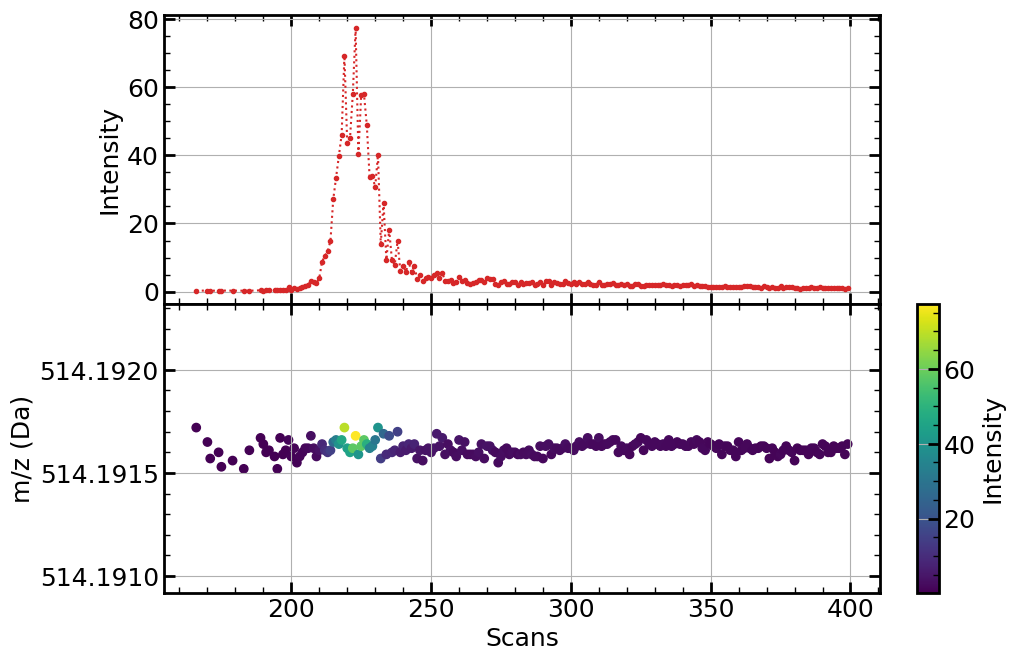

In [35]:
new_roi[10672].plot();

To export the results as csv:

```python
attr_pl.to_csv('results.csv')
```